In [1]:
import pandas as pd 

from generate import generate_cell_data, generate_gene_data
# Example usage:
ncells = 2000
ngenes = 100
nclusters = 3
ref_cols = ["blue", "brown", "gold"]
prop = [0.65, 0.3, 0.05]
xmus = [2.5, 3.5, 1.5]
xsds = [0.1, 0.1, 0.1]
ymus = [3.5, 1.5, 2]
ysds = [0.1, 0.1, 0.1]

row_names = [f"Cell {i+1}" for i in range(ncells)]
col_names = [f"Gene {i+1}" for i in range(ngenes)]


samples_cell_1, clust_cell_1 = generate_cell_data(ncells=ncells, ngenes=ngenes, nclusters=nclusters, 
                                              xmus=xmus, xsds=xsds, ymus=ymus, 
                                              ysds=ysds, prop=prop, ref_cols=ref_cols)


In [2]:
samples_cell_2, clust_cell_2 = generate_cell_data(ncells=ncells, ngenes=ngenes, nclusters=nclusters, 
                                              xmus=xmus, xsds=xsds, ymus=ymus, 
                                              ysds=ysds, prop=prop, ref_cols=ref_cols)


In [3]:
ref_cols_gene = ['black', 'pink', 'green', 'brown']


xmus = [2.5, 3.5, 1.5, 0.5]
xsds = [0.2, 0.1, 0.1, 0.1]
ymus = [3.5, 1.5, 2, 0.5]
ysds = [0.2, 0.1, 0.1, 0.1]

                 
samples_gene_1, clust_gene_1 = generate_gene_data(ncells=ncells, ngenes=ngenes, nclusters=4, 
                                              xmus=xmus, xsds=xsds, ymus=ymus, 
                                              ysds=ysds, prop=[0.32, 0.33, 0.33, 0.02], ref_cols=ref_cols_gene)



In [4]:
ref_cols_gene = ['black', 'pink', 'green', 'brown']


xmus = [2.5, 3.5, 1.5, 0.5]
xsds = [0.2, 0.1, 0.1, 0.1]
ymus = [3.5, 1.5, 2, 0.5]
ysds = [0.2, 0.1, 0.1, 0.1]

                 
samples_gene_2, clust_gene_2 = generate_gene_data(ncells=ncells, ngenes=ngenes, nclusters=4, 
                                              xmus=xmus, xsds=xsds, ymus=ymus, 
                                              ysds=ysds, prop=[0.34 - 0.0000001, 0.33, 0.33, 0.0000001], ref_cols=ref_cols_gene)



In [5]:
import numpy as np
data_to_save = np.column_stack((samples_gene_2, clust_gene_2))
header = 'X1, X2, clust'
np.savetxt("exp3_samples_gene_2.csv", data_to_save, delimiter=",", header=header, comments="", fmt="%s")


In [6]:
import numpy as np
data_to_save = np.column_stack((samples_cell_2, clust_cell_2))
header = 'X1, X2, clust'
np.savetxt("exp3_samples_cell_2.csv", data_to_save, delimiter=",", header=header, comments="", fmt="%s")


In [7]:
import numpy as np
data_to_save = np.column_stack((samples_cell_1, clust_cell_1))
header = 'X1, X2, clust'
np.savetxt("exp3_samples_cell_1.csv", data_to_save, delimiter=",", header=header, comments="", fmt="%s")

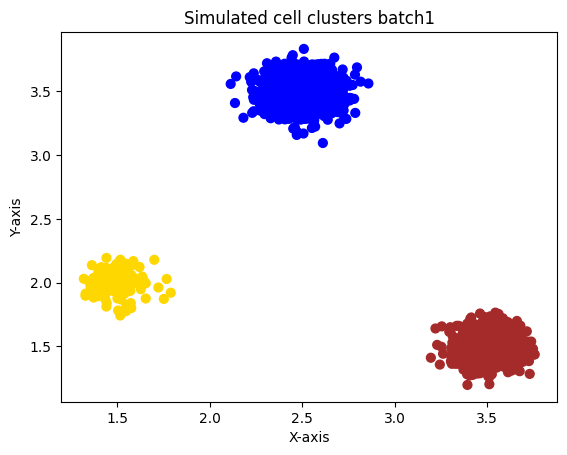

In [8]:
import matplotlib.pyplot as plt

plt.scatter(samples_cell_1[:, 0], samples_cell_1[:, 1], marker='o', s=40, c=clust_cell_1)
plt.title("Simulated cell clusters batch1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.savefig('exp2_cell_batch1.png')
plt.show()

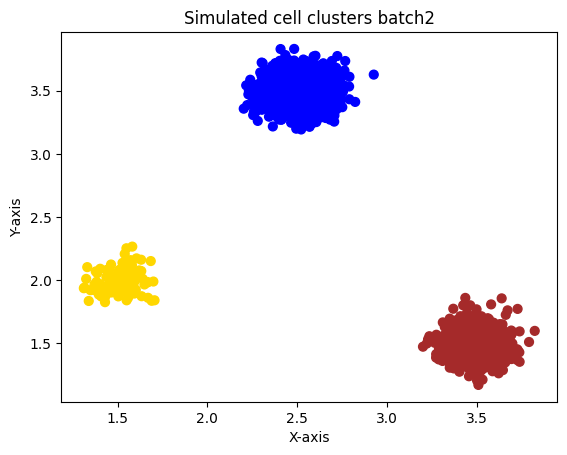

In [9]:
import matplotlib.pyplot as plt

plt.scatter(samples_cell_2[:, 0], samples_cell_2[:, 1], marker='o', s=40, c=clust_cell_2)
plt.title("Simulated cell clusters batch2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.savefig('exp2_cell_batch2.png')
plt.show()

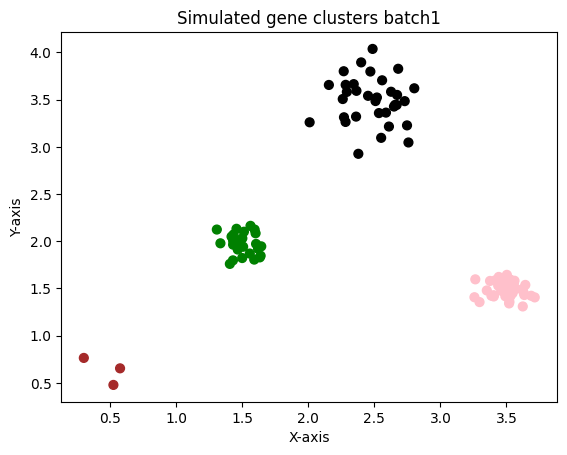

In [10]:
import matplotlib.pyplot as plt

plt.scatter(samples_gene_1[:, 0], samples_gene_1[:, 1], marker='o', s=40, c=clust_gene_1)
plt.title("Simulated gene clusters batch1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.savefig('exp2_gene_batch1.png')
plt.show()

In [11]:
np.unique(clust_gene_1, return_counts = True)

(array(['black', 'brown', 'green', 'pink'], dtype='<U5'),
 array([33,  3, 28, 36]))

In [12]:
np.unique(clust_gene_2, return_counts = True)

(array(['black', 'green', 'pink'], dtype='<U5'), array([33, 42, 25]))

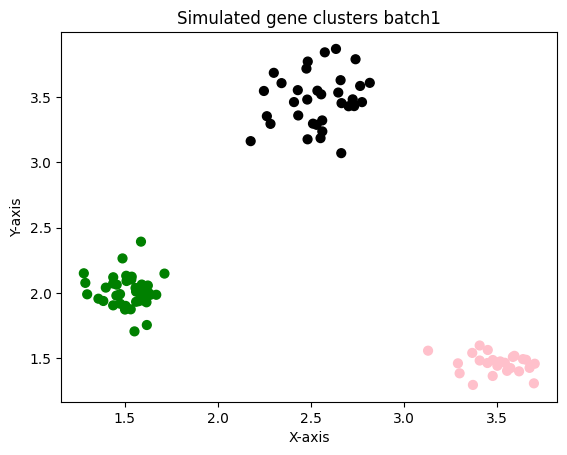

In [13]:
import matplotlib.pyplot as plt

plt.scatter(samples_gene_2[:, 0], samples_gene_2[:, 1], marker='o', s=40, c=clust_gene_2)
plt.title("Simulated gene clusters batch1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.savefig('exp2_gene_batch2.png')
plt.show()

In [14]:
import numpy as np
X1 = np.dot(samples_cell_1, samples_gene_1.T)

In [15]:
X2 = np.dot(samples_cell_1, samples_gene_2.T)

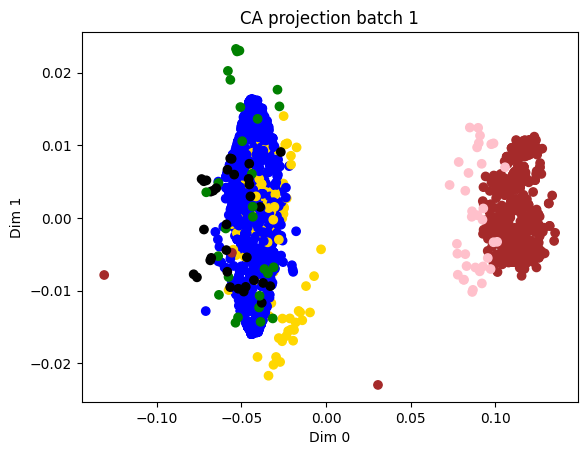

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ca import CA


transfer = CA(n_components=2)

transfer.fit(contingency_table=X1)

pcs_row1, pcs_col1 = \
    transfer.get_princpl_coords_df(row_categories=row_names,
                                   col_categories=col_names)
variances = transfer.principal_inertias_
percent_explnd_var = (variances / variances.sum()) * 100

fig, ax = plt.subplots()
plt.scatter(x='Dim 0', y='Dim 1', data=pcs_row1, c=clust_cell_1)
plt.scatter(x='Dim 0', y='Dim 1', data=pcs_col1, c=clust_gene_1)
plt.title('CA projection batch 1')


plt.savefig('exp2_ca1.png')
ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.show()



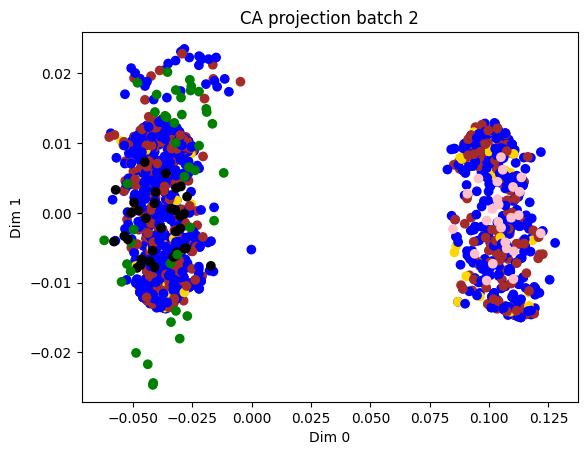

In [17]:
transfer = CA(n_components=2)

transfer.fit(contingency_table=X2)

pcs_row2, pcs_col2 = \
    transfer.get_princpl_coords_df(row_categories=row_names,
                                   col_categories=col_names)
variances = transfer.principal_inertias_
percent_explnd_var = (variances / variances.sum()) * 100

fig, ax = plt.subplots()
plt.scatter(x='Dim 0', y='Dim 1', data=pcs_row2, c=clust_cell_2)
plt.scatter(x='Dim 0', y='Dim 1', data=pcs_col2, c=clust_gene_2)
plt.title('CA projection batch 2')

plt.savefig('exp2_ca2.png')
ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.show()



In [18]:
import numpy as np

def calculate_length_vector_sample(avg_sample_coord, index_cluster):
    length_vector_sample = np.sqrt(np.sum(np.square(avg_sample_coord[index_cluster])))
    return length_vector_sample

def calculate_S_coordinates_sincos(avg_sample_coord, samples, index_cluster):
    num_samples, num_dims = samples.shape

    length_vector_samples = np.sqrt(np.sum(samples**2, axis=0))
    tmp = np.dot(avg_sample_coord[index_cluster], samples)
    
    Sx = tmp / calculate_length_vector_sample(avg_sample_coord, index_cluster)
    Sy = np.sqrt(length_vector_samples**2 - Sx**2)
    
    return Sx, Sy


In [19]:
def calculate_G_coordinates_sincos(avg_sample_coord, genes, index_cluster):
    num_samples, num_dims = samples.shape

    length_vector_genes = np.sqrt(np.sum(genes**2, axis=0))
    tmp = np.dot(avg_sample_coord[index_cluster], genes)
    
    Gx = tmp / calculate_length_vector_sample(avg_sample_coord, index_cluster)
    Gy = np.sqrt(length_vector_genes**2 - Gx**2)
    
    return Sx, Sy

In [37]:
from sklearn.cluster import KMeans
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(pcs_col1)

cluster_labels = kmeans.labels_

index_cluster = 0

Sx1, Sy1 = calculate_S_coordinates_sincos(kmeans.cluster_centers_, pcs_row1.values.T, index_cluster)
Gx1, Gy1 = calculate_S_coordinates_sincos(kmeans.cluster_centers_, pcs_col1.values.T, index_cluster)

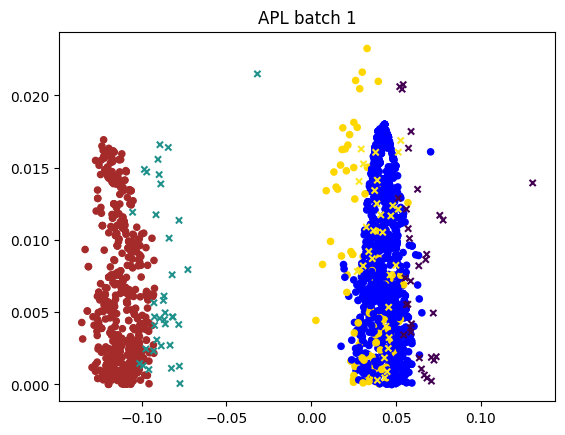

In [38]:
plt.scatter(Sx1, Sy1, s=20, c=clust_cell_1, marker='o')
plt.scatter(Gx1, Gy1, s=20, c=cluster_labels, marker='x')
plt.savefig('exp_2_apl_batch1.png')

plt.title('APL batch 1')
plt.show()

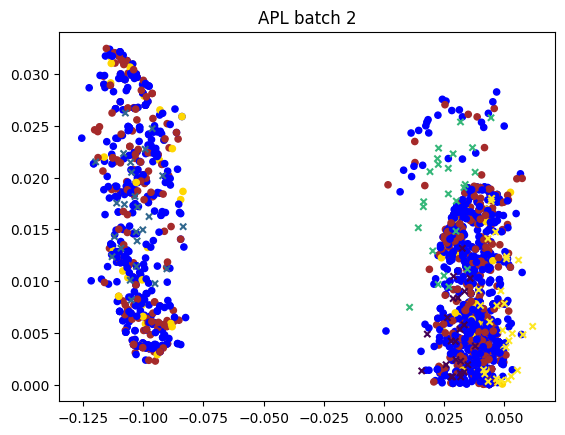

In [39]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(pcs_col2)

cluster_labels = kmeans.labels_

index_cluster = 0

Sx2, Sy2 = calculate_S_coordinates_sincos(kmeans.cluster_centers_, pcs_row2.values.T, index_cluster)
Gx2, Gy2 = calculate_S_coordinates_sincos(kmeans.cluster_centers_, pcs_col2.values.T, index_cluster)

plt.scatter(Sx2, Sy2, s=20, c=clust_cell_2, marker='o')
plt.scatter(Gx2, Gy2, s=20, c=cluster_labels, marker='x')
plt.savefig('exp_2_apl_batch2.png')

plt.title('APL batch 2')
plt.show()

In [45]:
from scipy.spatial import cKDTree

def find_mutual_nn(data1, data2, k1, k2, n_jobs):
    k_index_1 = cKDTree(data1).query(x=data2, k=k1, workers=n_jobs)[1]
    k_index_2 = cKDTree(data2).query(x=data1, k=k2, workers=n_jobs)[1]
    mutual_1 = []
    mutual_2 = []
    for index_2 in range(data2.shape[0]):
        for index_1 in k_index_1[index_2]:
            if index_2 in k_index_2[index_1]:
                mutual_1.append(index_1)
                mutual_2.append(index_2)
    return mutual_1, mutual_2

k = 5
n_jobs = 5
b1 = np.column_stack((Sx1, Sy1))
b2 = np.column_stack((Sx2, Sy2))
mnn_ref, mnn_new = find_mutual_nn(data1=b1,
                                  data2=b2, k1=k, k2=k,  n_jobs=n_jobs)

In [46]:
import numpy as np

def compute_correction(data1, data2, mnn1, mnn2, data2_or_raw2, sigma):
    #w
    B = data1[mnn1] - data2[mnn2]
    mnn_index, mnn_count = np.unique(mnn2, return_counts=True)
    vect_reduced = np.zeros((data2.shape[0], B.shape[1]), dtype=np.float32)
    for index, ve in zip(mnn2, B):
        vect_reduced[index] += ve
    vect_avg = np.divide(vect_reduced[mnn_index], mnn_count.astype(np.float32)[:, None])
    #D_c_i
    exp_distance = np.exp(-kdist(data2_or_raw2, data2_or_raw2[mnn_index]) / sigma)
    density = np.sum(exp_distance[mnn_index], axis=0)
    mult = np.divide(exp_distance, density)
    total_prob = np.sum(mult, axis=1, keepdims=True)
    output = np.dot(mult, vect_avg)

    return np.divide(output, total_prob)

In [47]:
def kdist(m, n):
    dist = np.zeros((m.shape[0], n.shape[0]), dtype=np.float32)
    for i in range(m.shape[0]):
        for j in range(n.shape[0]):
            dist[i, j] = np.dot(m[i], n[j])
    return dist

In [48]:
Sx

array([ 0.0373495 , -0.09794731,  0.04346615, ..., -0.10184526,
        0.033703  , -0.10436841])

In [50]:
sigma = 10
correction_in = compute_correction(b1, b2, mnn_ref, mnn_new,
                                           b2, sigma)

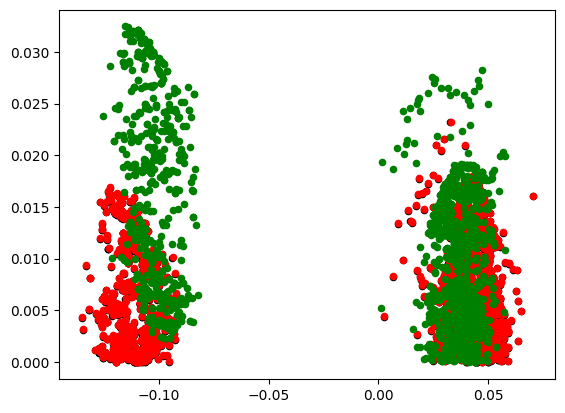

In [52]:
plt.scatter((b1 + correction_in)[:, 0], (b1 + correction_in)[:, 1], marker='o', s=20, c='black')
plt.scatter((b1)[:, 0], (b1)[:, 1], marker='o', s=20, c='red')
plt.scatter((b2)[:, 0], (b2)[:, 1], marker='o', s=20, c='green')